#Debojit Makhal

In [96]:
print ("my name is " +name)

my name is debojit


In [8]:
from sklearn import datasets

In [9]:
iris_datset= datasets.load_iris()

In [10]:
x= iris_datset.data[:,:2]

In [11]:
x_count=len(x.flat)
x_min= x[:,0].min() - .5
x_max= x[:,0].max() - .5
x_mean= x[:,0].mean()


In [12]:
x_count,x_min,x_max,x_mean

(300, np.float64(3.8), np.float64(7.4), np.float64(5.843333333333334))

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [18]:
file_path = "Data set.xlsx" # Update with the path to your Excel file
df = pd.read_excel(file_path)

In [19]:
print(df.head())  # Display the first few rows to understand the data structure
print(df.info())


  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4             

In [20]:
df.dropna(inplace=True)

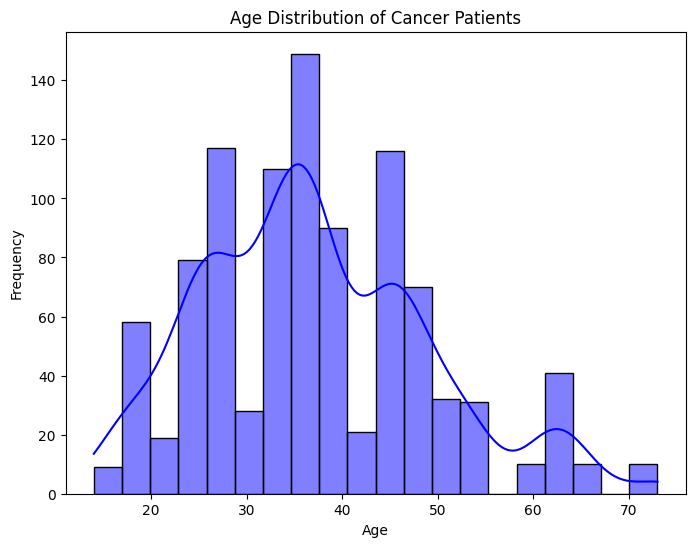

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Cancer Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

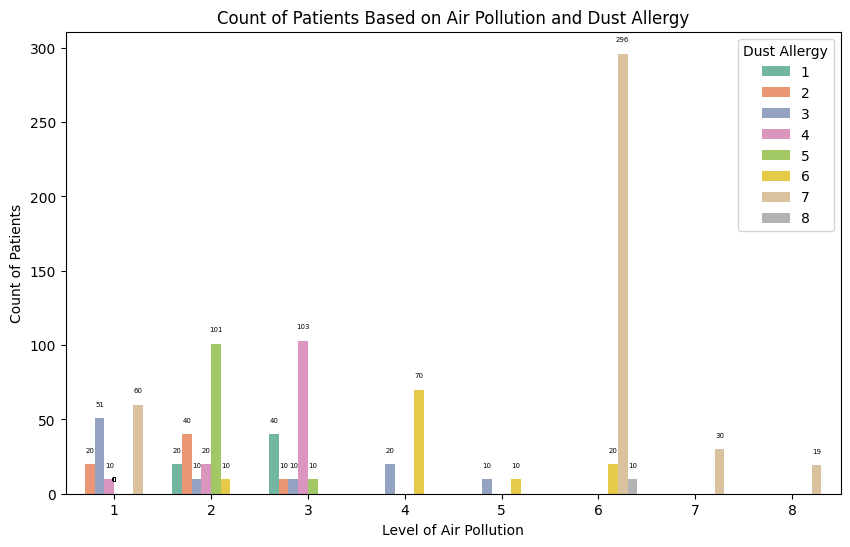

In [107]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Air Pollution', hue='Dust Allergy', data=df, palette='Set2')

# Step 5: Annotate the bars with the count of patients
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # The number on top of each bar
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Positioning it at the top of each bar
                ha='center', va='center', fontsize=5, color='black',xytext=(0, 10),
                textcoords='offset points')

# Step 6: Customize the plot (optional)
plt.title('Count of Patients Based on Air Pollution and Dust Allergy')
plt.xlabel('Level of Air Pollution')  # Label for x-axis
plt.ylabel('Count of Patients')  # Label for y-axis
plt.legend(title='Dust Allergy', loc='upper right')
plt.show()

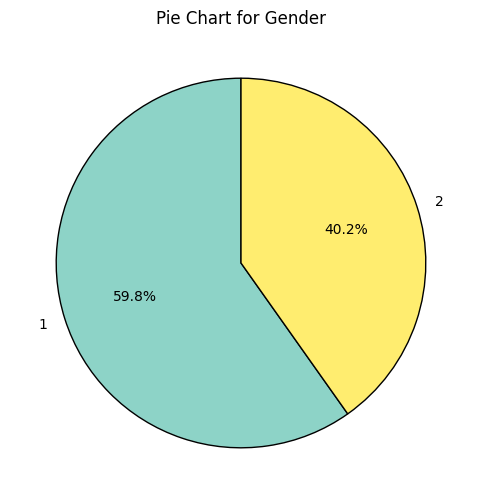

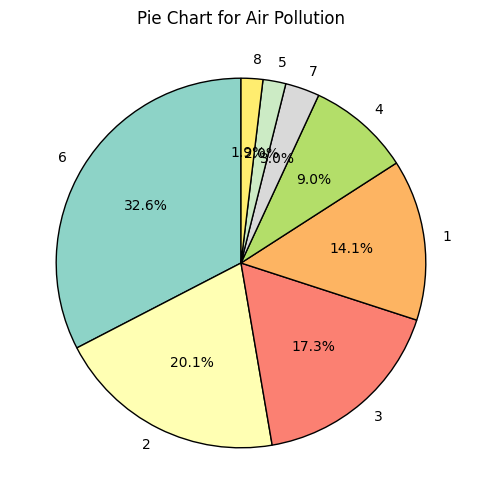

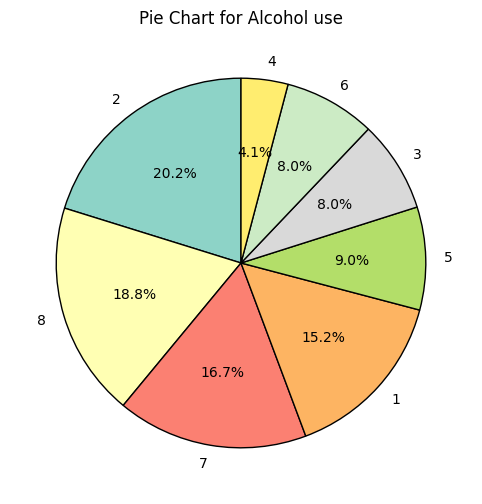

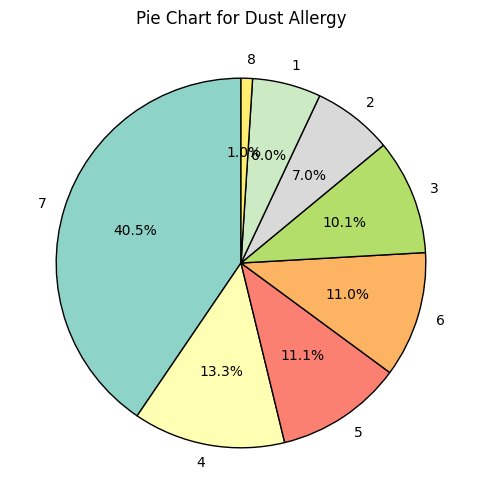

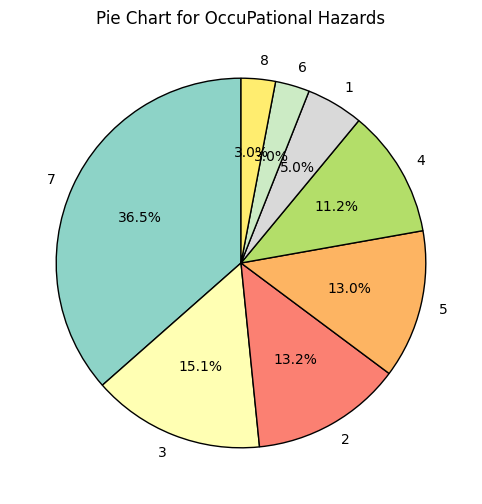

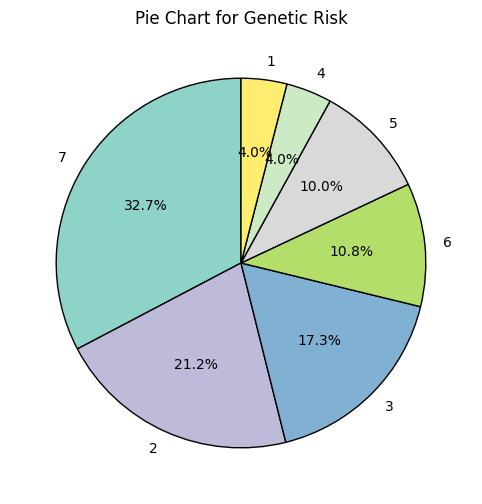

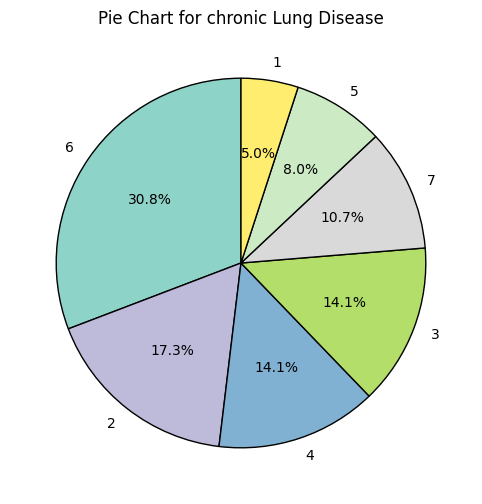

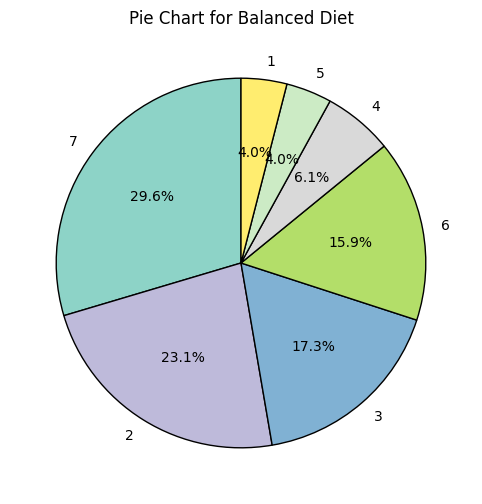

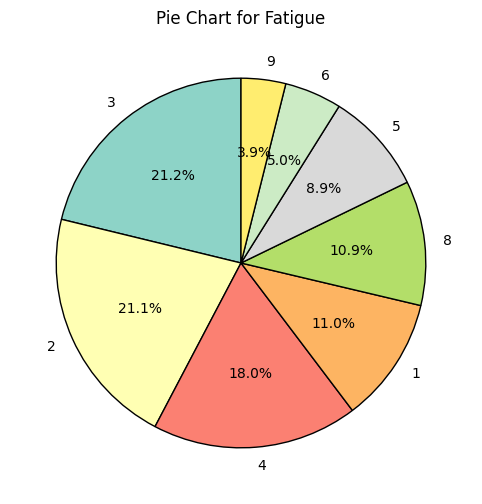

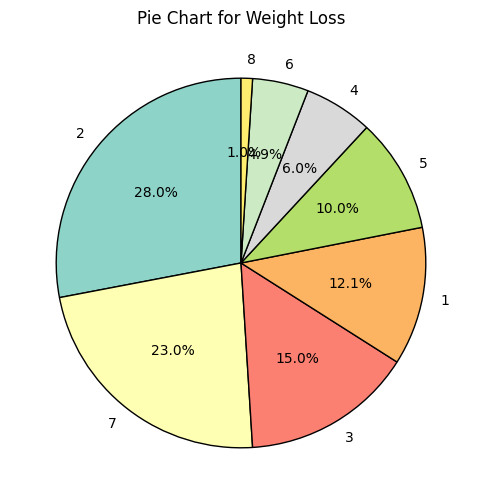

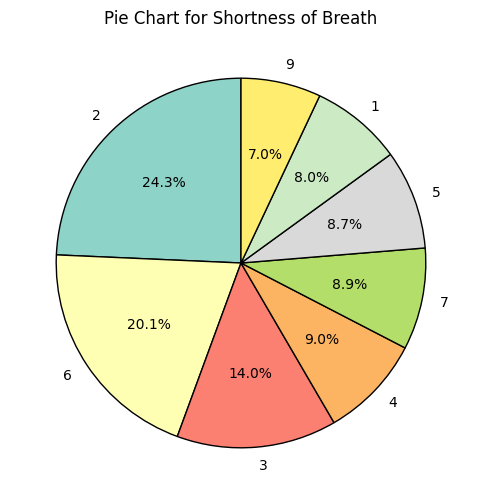

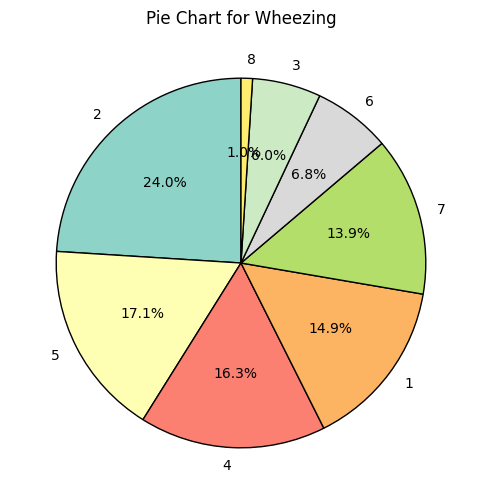

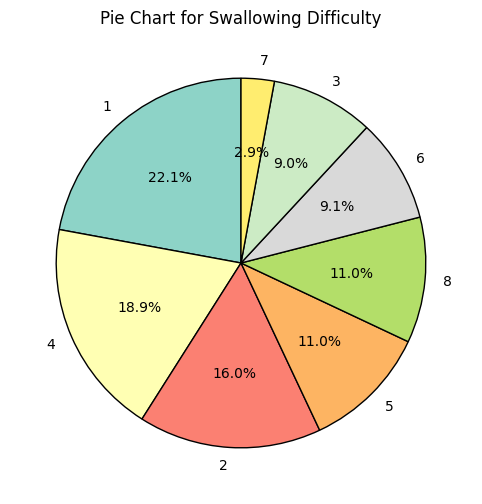

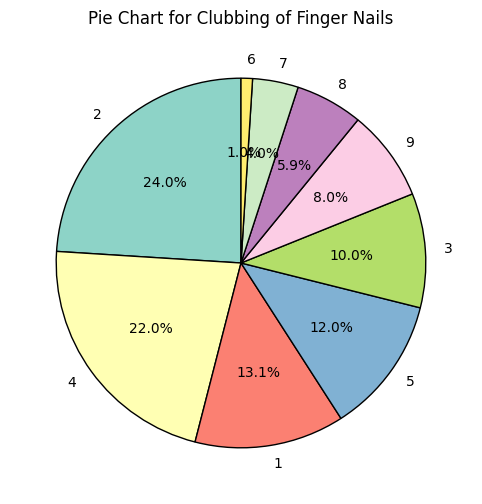

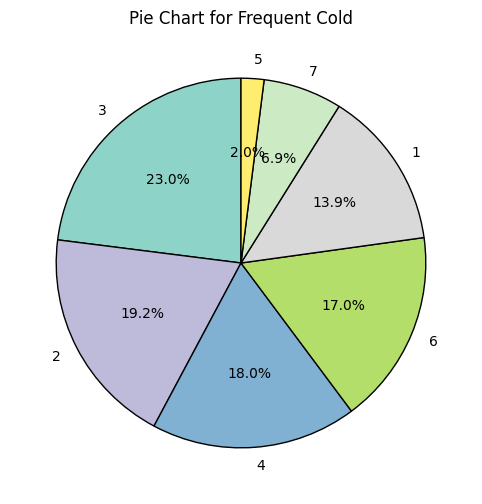

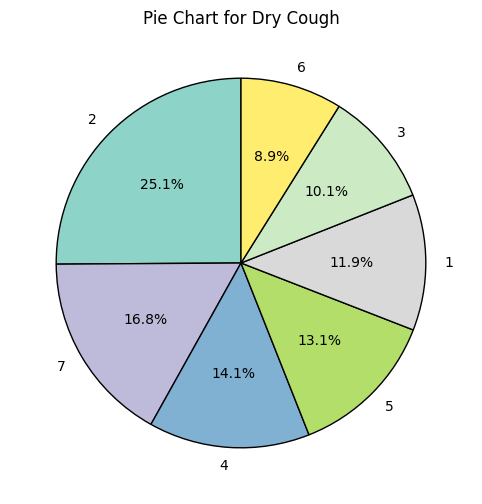

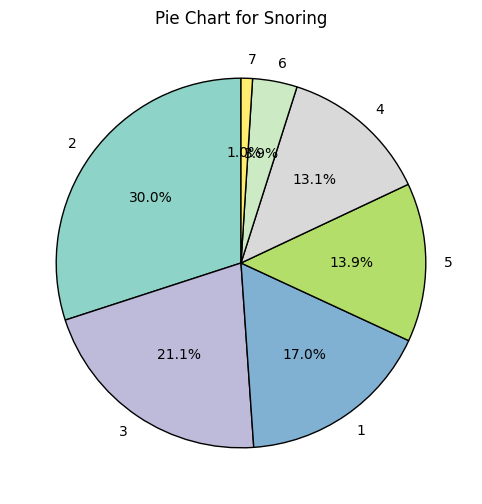

In [108]:
categorical_columns = ['Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 
                       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 
                       'Balanced Diet', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 
                       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 
                       'Frequent Cold', 'Dry Cough', 'Snoring']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', wedgeprops={'edgecolor': 'black'})
    plt.title(f'Pie Chart for {column}')
    plt.ylabel('')
    plt.show()

In [23]:
X = df.drop(columns=['Patient Id', 'Level'])  # Features
y = df['Level']  # Target

# Encode the target variable (categorical to numerical)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X, y_encoded)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_features = features[sorted_indices]
sorted_importances = importances[sorted_indices]

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Health Severity Level')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

ValueError: could not convert string to float: 'Frequent Drinker'

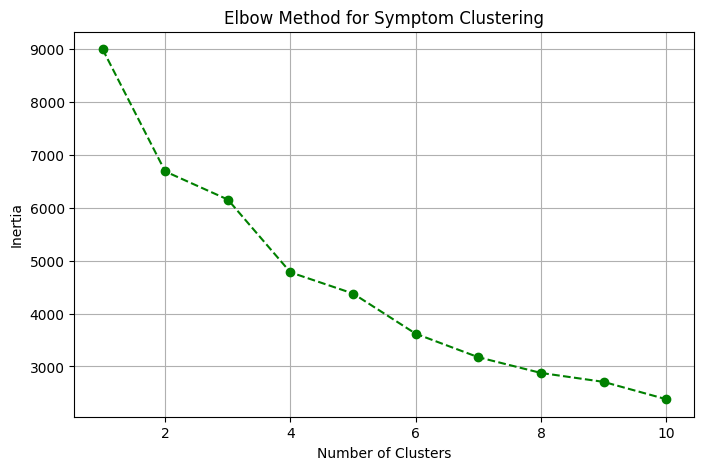

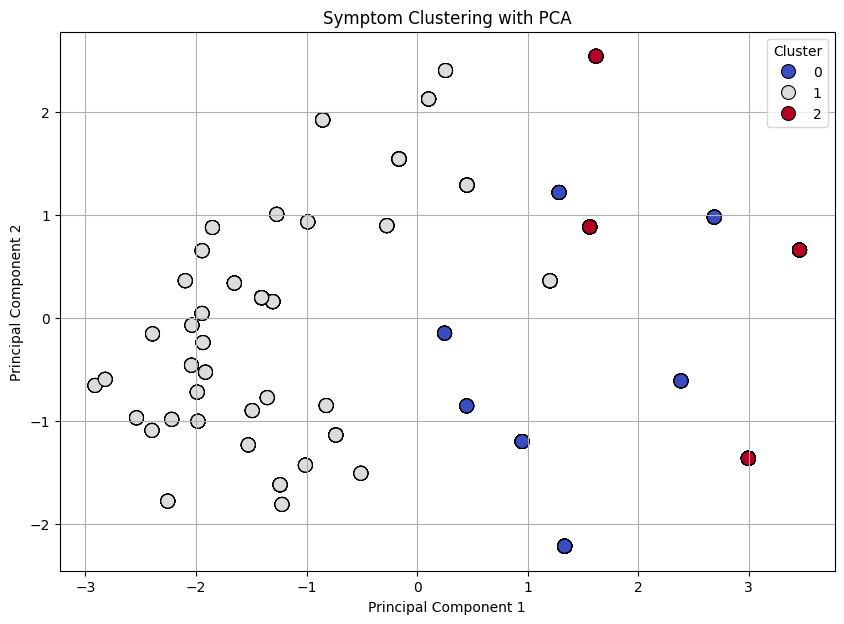

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
scaler = StandardScaler()

# df = pd.read_excel('/path/to/your/excel/file.xlsx')

# Select symptom-related columns
symptom_columns = ['Shortness of Breath', 'Wheezing', 'Fatigue', 'Weight Loss', 
                   'Swallowing Difficulty', 'Clubbing of Finger Nails', 
                   'Frequent Cold', 'Dry Cough', 'Snoring']
symptom_df = df[symptom_columns]

# Normalize the symptom df
scaler = StandardScaler()
normalized_symptom_df = scaler.fit_transform(symptom_df)

# Determine the optimal number of clusters using the elbow method
range_clusters = range(1, 11)
symptom_inertia = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_symptom_df)
    symptom_inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, symptom_inertia, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Symptom Clustering')
plt.grid(True)
plt.show()

# Perform K-Means clustering with an optimal number of clusters
k_symptoms = 3  # Replace with the optimal value from the elbow curve
kmeans_symptoms = KMeans(n_clusters=k_symptoms, random_state=0)
symptom_clusters = kmeans_symptoms.fit_predict(normalized_symptom_df)

# Add symptom cluster labels to the dfset
df['Symptom Cluster'] = symptom_clusters

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_symptom_df)

# Create a scatter plot with symptom names included in tooltips
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=symptom_clusters, 
                palette='coolwarm', s=100, edgecolor='k')
# for i, symptom in enumerate(symptom_columns):
#     plt.text(pca.components_[0, i], pca.components_[1, i], symptom, 
#              fontsize=2, color='black', ha='right')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Symptom Clustering with PCA')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

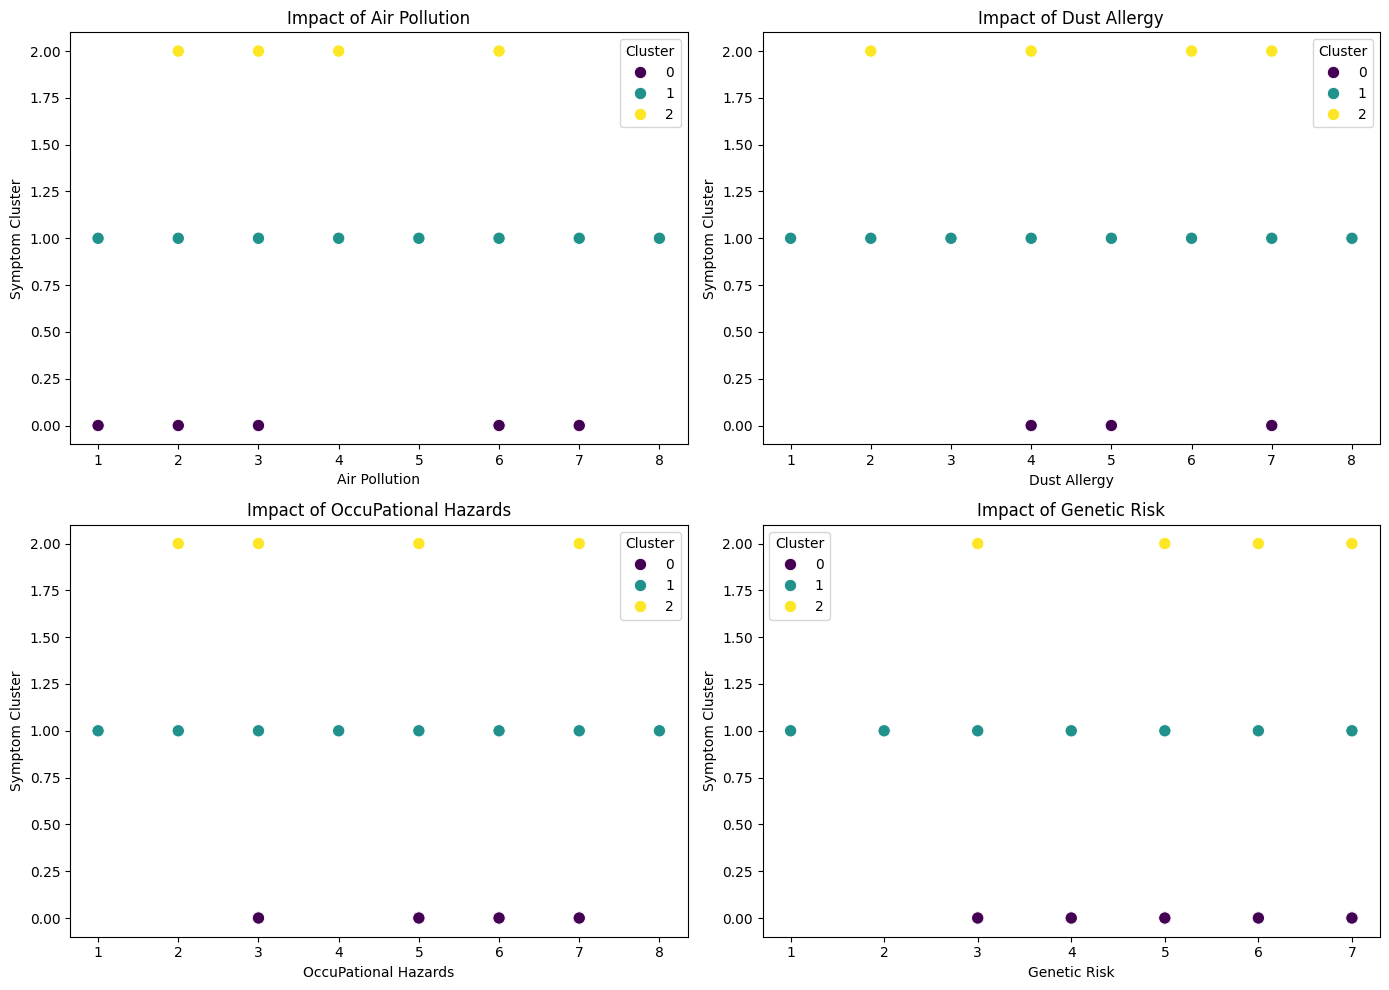

C:\Users\OMEN\AppData\Local\Temp\ipykernel_6092\4256061127.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Symptom Cluster'], y=df[factor], palette='pastel')
C:\Users\OMEN\AppData\Local\Temp\ipykernel_6092\4256061127.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Symptom Cluster'], y=df[factor], palette='pastel')
C:\Users\OMEN\AppData\Local\Temp\ipykernel_6092\4256061127.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Symptom Cluster'], y=df[factor], palette='pastel')
C:\Users\OMEN\AppData\Local\Temp\ipykern

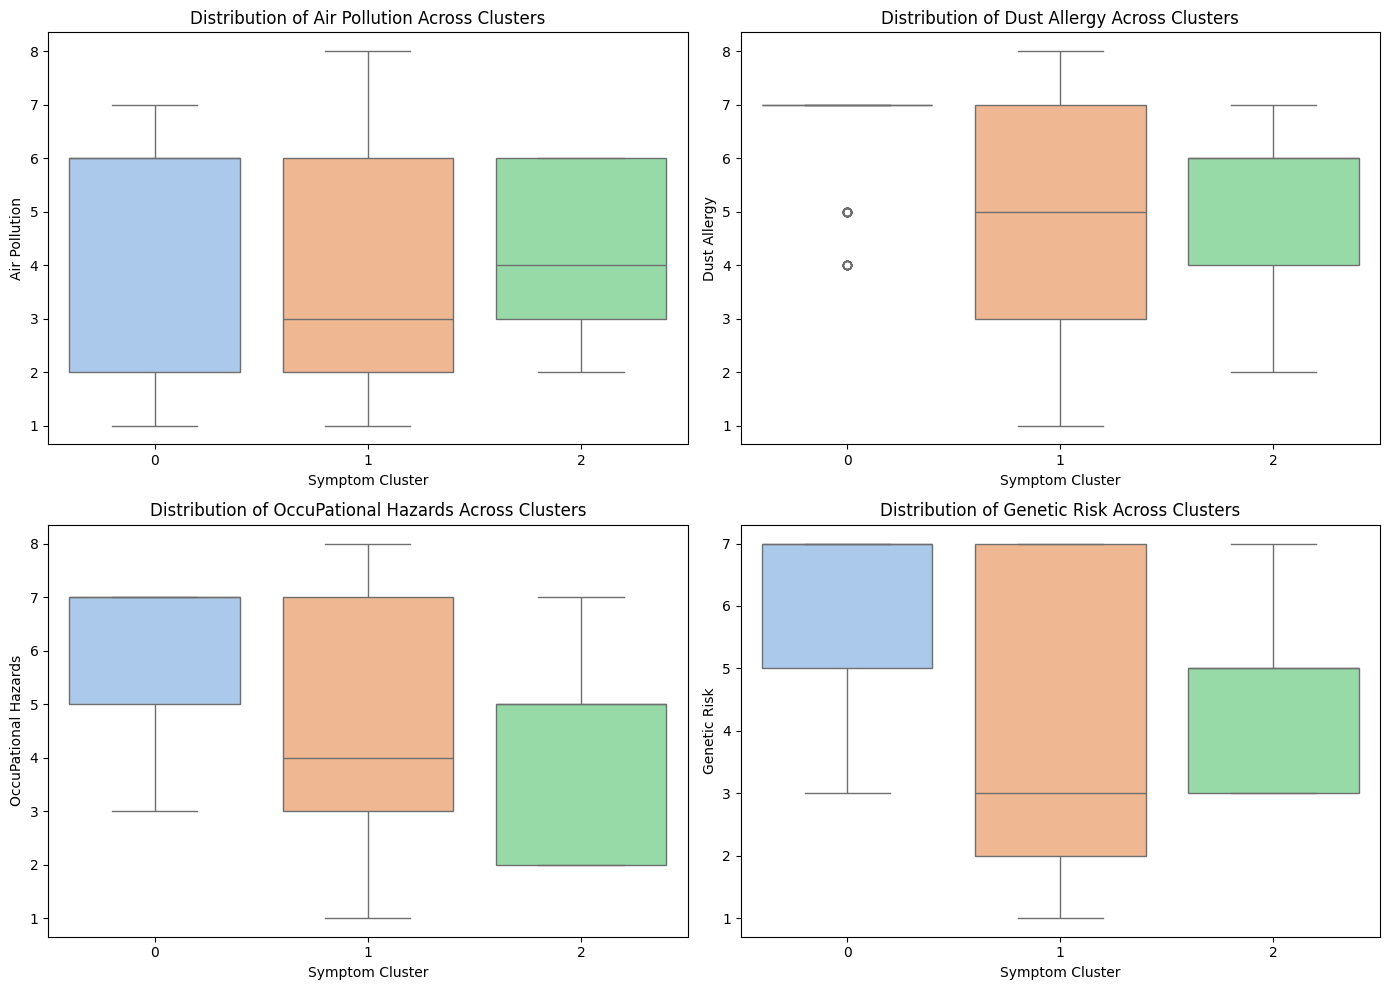

In [26]:
# Define the environmental factors
environmental_factors = ['Air Pollution', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk']

# Plot scatter plots for each environmental factor
plt.figure(figsize=(14, 10))
for i, factor in enumerate(environmental_factors, 1):
    plt.subplot(2, 2, i)  # Adjust grid dimensions as needed
    sns.scatterplot(x=df[factor], y=df['Symptom Cluster'], hue=df['Symptom Cluster'], palette='viridis', s=80)
    plt.title(f'Impact of {factor}')
    plt.xlabel(factor)
    plt.ylabel('Symptom Cluster')
    plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Box plots for distribution analysis
plt.figure(figsize=(14, 10))
for i, factor in enumerate(environmental_factors, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df['Symptom Cluster'], y=df[factor], palette='pastel')
    plt.title(f'Distribution of {factor} Across Clusters')
    plt.xlabel('Symptom Cluster')
    plt.ylabel(factor)
plt.tight_layout()
plt.show()


C:\Users\OMEN\AppData\Local\Temp\ipykernel_15104\3675267767.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Level'], y=df[factor], palette='coolwarm', ci=None)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_15104\3675267767.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Level'], y=df[factor], palette='coolwarm', ci=None)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_15104\3675267767.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Level'], y=df[factor], palette='coolwarm', ci=None)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_15104\3675267767.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

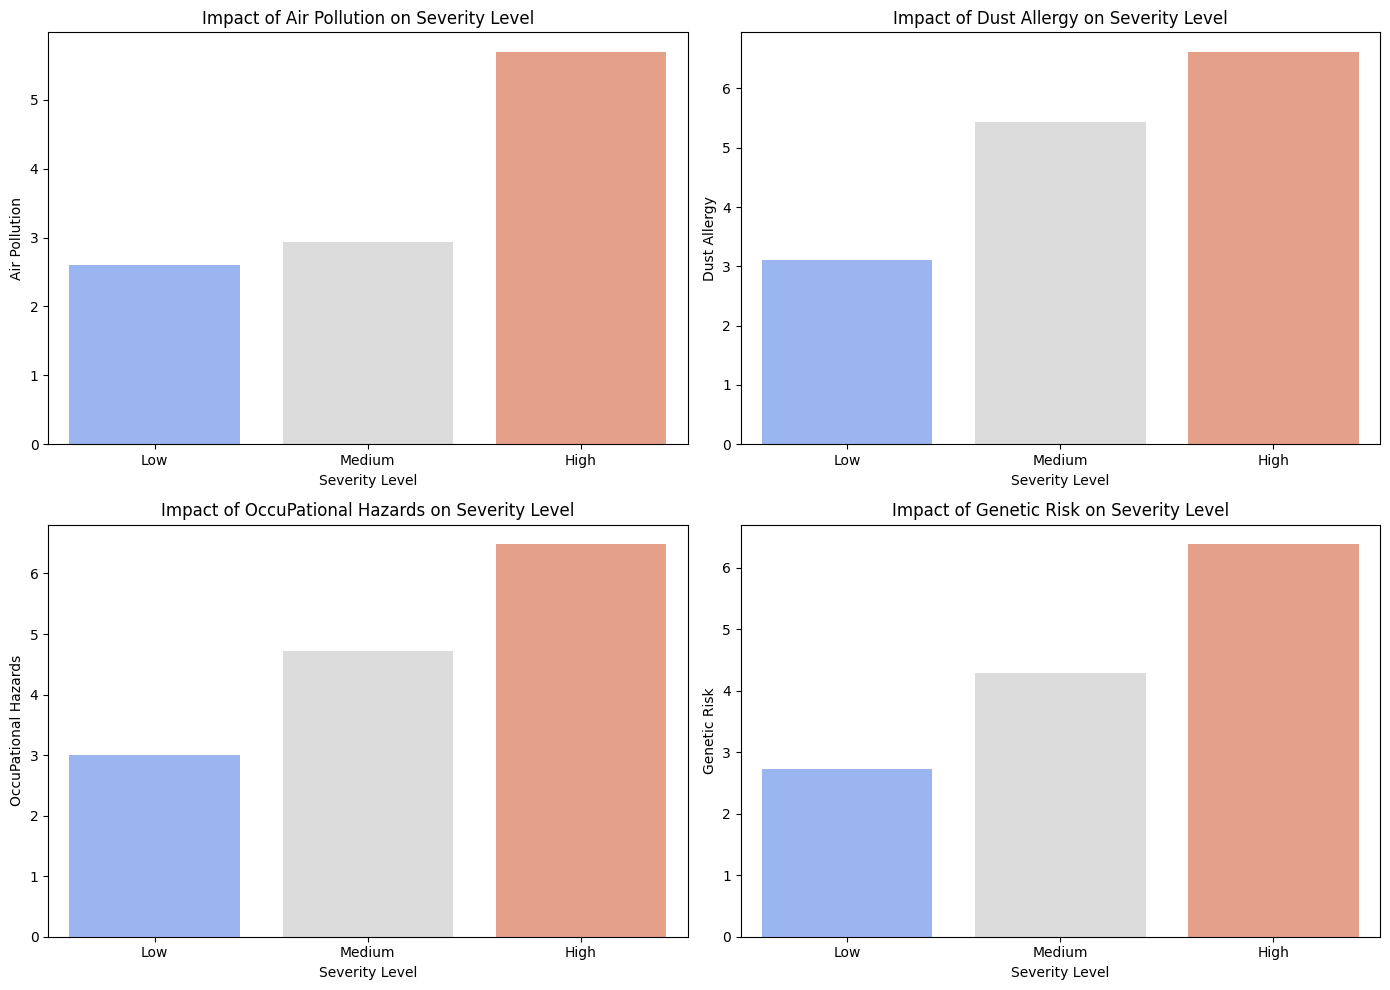

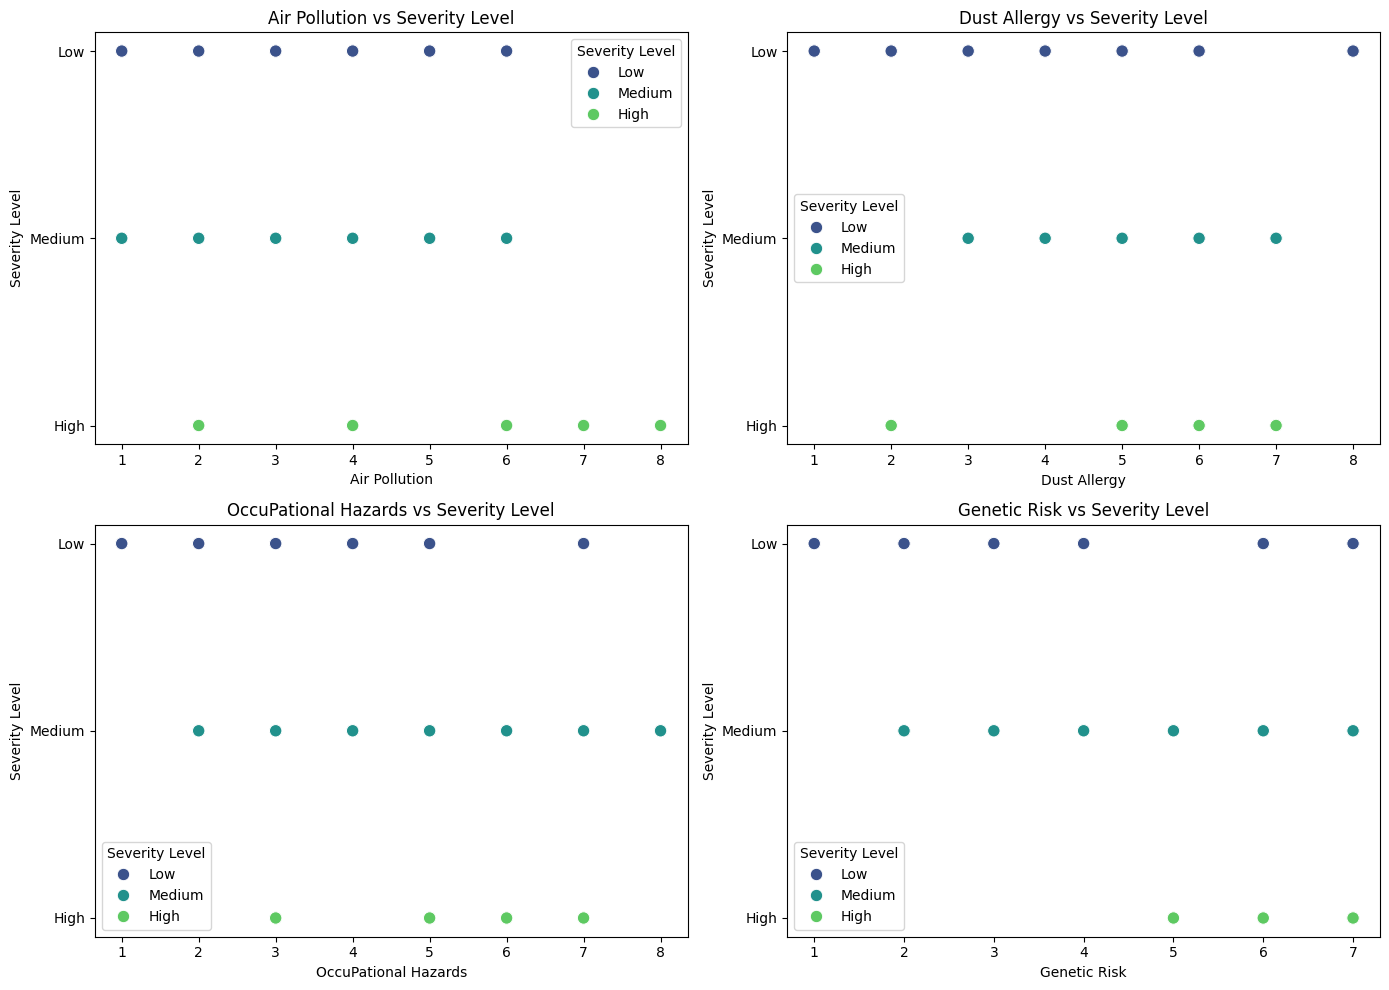

In [23]:
# Define the environmental factors
environmental_factors = ['Air Pollution', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk']

# Bar plots for each environmental factor against severity levels
plt.figure(figsize=(14, 10))
for i, factor in enumerate(environmental_factors, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=df['Level'], y=df[factor], palette='coolwarm', ci=None)
    plt.title(f'Impact of {factor} on Severity Level')
    plt.xlabel('Severity Level')
    plt.ylabel(factor)
plt.tight_layout()
plt.show()

# Scatter plots for each environmental factor against severity levels
plt.figure(figsize=(14, 10))
for i, factor in enumerate(environmental_factors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[factor], y=df['Level'], hue=df['Level'], palette='viridis', s=80)
    plt.title(f'{factor} vs Severity Level')
    plt.xlabel(factor)
    plt.ylabel('Severity Level')
    plt.legend(title='Severity Level')
plt.tight_layout()
plt.show()



C:\Users\OMEN\AppData\Local\Temp\ipykernel_6092\3156321970.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Level'], y=df['OccuPational Hazards'], palette='coolwarm', ci=None)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_6092\3156321970.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Level'], y=df['OccuPational Hazards'], palette='coolwarm', ci=None)


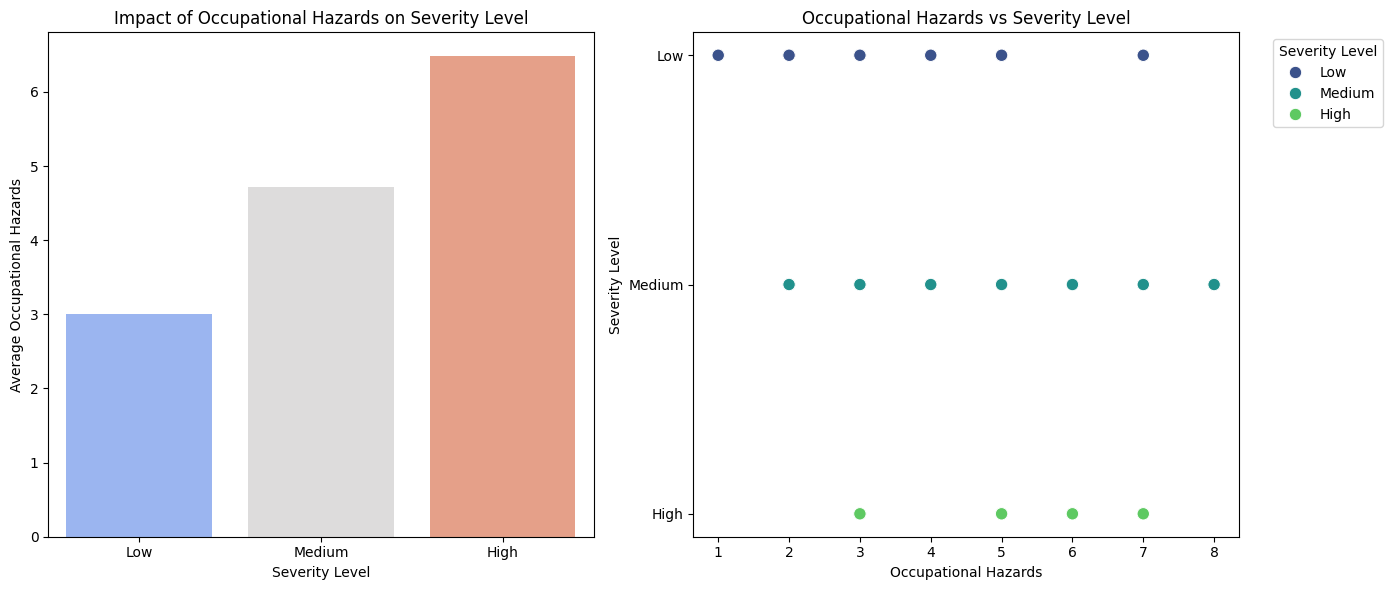

In [29]:
# Create a bivariate graph for Occupational Hazards vs Severity Level

plt.figure(figsize=(14, 6))

# Bar Plot: Average Occupational Hazards by Severity Level
plt.subplot(1, 2, 1)
sns.barplot(x=df['Level'], y=df['OccuPational Hazards'], palette='coolwarm', ci=None)
plt.title('Impact of Occupational Hazards on Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Average Occupational Hazards')

# Scatter Plot: Individual df points for Occupational Hazards vs Severity Level
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['OccuPational Hazards'], y=df['Level'], hue=df['Level'], palette='viridis', s=80)
plt.title('Occupational Hazards vs Severity Level')
plt.xlabel('Occupational Hazards')
plt.ylabel('Severity Level')
plt.legend(title='Severity Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\OMEN\AppData\Local\Temp\ipykernel_6092\3353095939.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Level'], y=df['Age'], hue=df['OccuPational Hazards Level'], palette='coolwarm', ci=None)


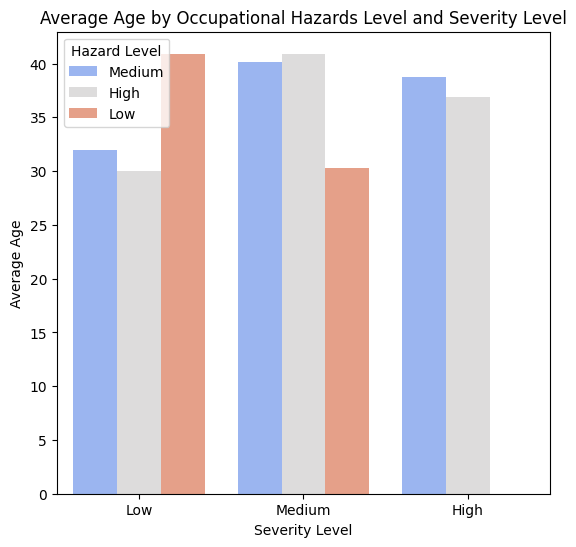

In [30]:
# Define the environmental factors
environmental_factors = ['Dust Allergy', 'Air Pollution', 'OccuPational Hazards', 'Genetic Risk']

# Function to categorize factors into levels
def categorize_factor(value):
    if 1 <= value <= 2:
        return 'Low'
    elif 3 <= value <= 5:
        return 'Medium'
    elif 6 <= value <= 8:
        return 'High'
    else:
        return 'Undefined'

# Create new categorized columns for each environmental factor
for factor in environmental_factors:
    df[f'{factor} Level'] = df[factor].apply(categorize_factor)

def categorize_age(age):
    if 10 <= age <= 18:
        return 'Teenager'
    elif 19 <= age <= 25:
        return 'Adult'
    elif 26 <= age <= 40:
        return 'Early Adult'
    elif 41 <= age <= 60:
        return 'Middle Age'
    elif 61 <= age <= 80:
        return 'Old People'
    else:
        return 'Undefined'
    
df['Age Level'] = df['Age'].apply(categorize_age)
# Bar plot for OccuPational Hazards Levels vs Severity Levels
plt.figure(figsize=(14, 6))

# Bar Plot: Frequency of Occupational Hazard Levels by Severity Level
plt.subplot(1, 2, 1)
sns.barplot(x=df['Level'], y=df['Age'], hue=df['OccuPational Hazards Level'], palette='coolwarm', ci=None)
plt.title('Average Age by Occupational Hazards Level and Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Average Age')
plt.legend(title='Hazard Level')

# Scatter Plot: Occupational Hazard Levels vs Severity Level



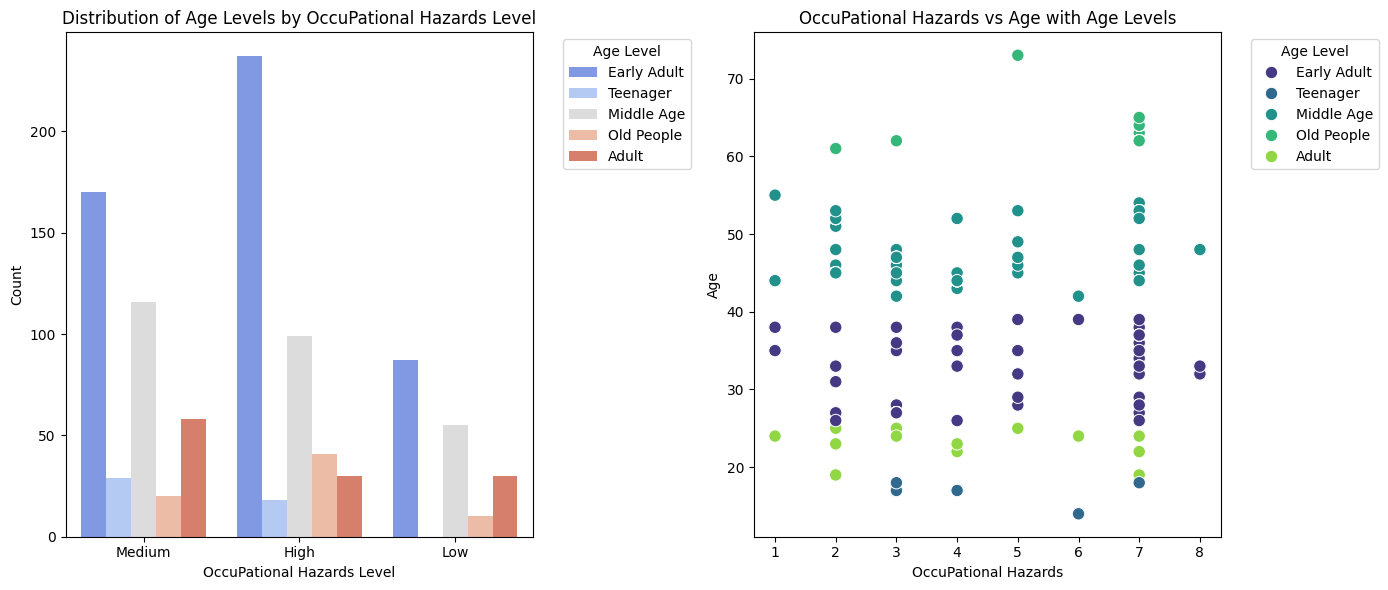

In [31]:
# Function to categorize age into levels
def categorize_age(age):
    if 10 <= age <= 18:
        return 'Teenager'
    elif 19 <= age <= 25:
        return 'Adult'
    elif 26 <= age <= 40:
        return 'Early Adult'
    elif 41 <= age <= 60:
        return 'Middle Age'
    elif 61 <= age <= 80:
        return 'Old People'
    else:
        return 'Undefined'

# Add a new column for age levels
df['Age Level'] = df['Age'].apply(categorize_age)

# Bar plot and scatter plot for OccuPational Hazards Level vs Age Level
plt.figure(figsize=(14, 6))

# Bar Plot: Distribution of Age Levels by Occupational Hazard Levels
plt.subplot(1, 2, 1)
sns.countplot(x=df['OccuPational Hazards Level'], hue=df['Age Level'], palette='coolwarm')
plt.title('Distribution of Age Levels by OccuPational Hazards Level')
plt.xlabel('OccuPational Hazards Level')
plt.ylabel('Count')
plt.legend(title='Age Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter Plot: OccuPational Hazards vs Age with Age Levels
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['OccuPational Hazards'], y=df['Age'], hue=df['Age Level'], palette='viridis', s=80)
plt.title('OccuPational Hazards vs Age with Age Levels')
plt.xlabel('OccuPational Hazards')
plt.ylabel('Age')
plt.legend(title='Age Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



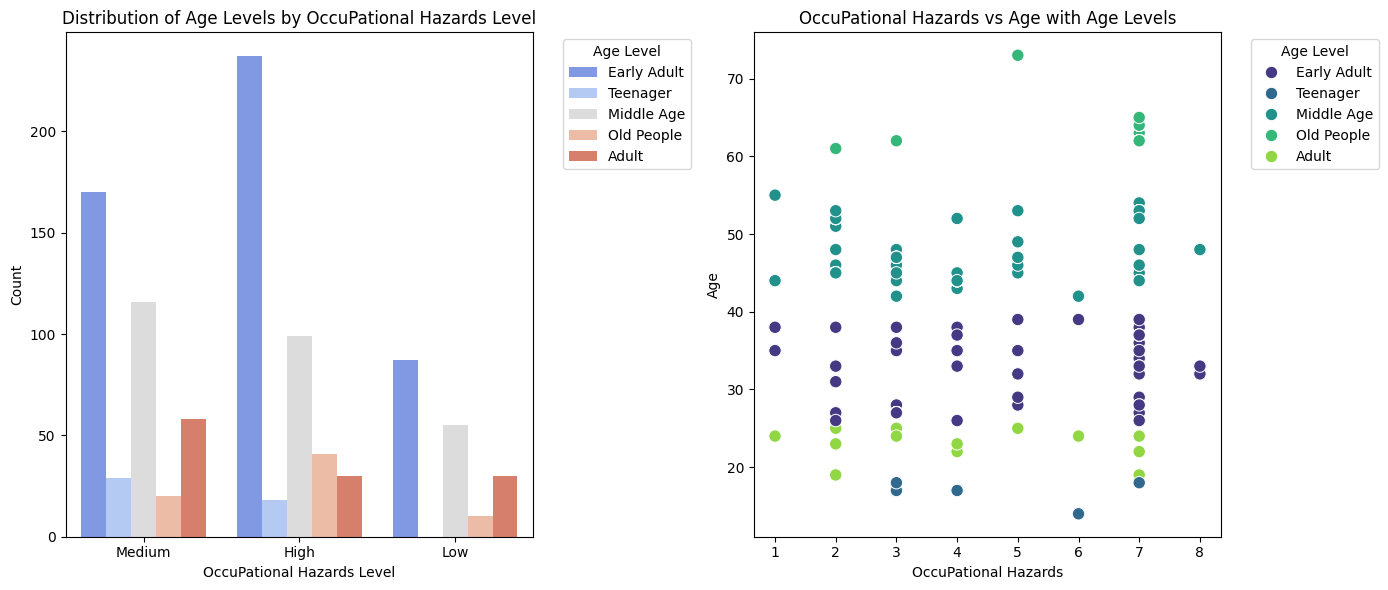

In [32]:
# Function to categorize age into levels
def categorize_age(age):
    if 10 <= age <= 18:
        return 'Teenager'
    elif 19 <= age <= 25:
        return 'Adult'
    elif 26 <= age <= 40:
        return 'Early Adult'
    elif 41 <= age <= 60:
        return 'Middle Age'
    elif 61 <= age <= 80:
        return 'Old People'
    else:
        return 'Undefined'

# Add a new column for age levels
df['Age Level'] = df['Age'].apply(categorize_age)

# Bar plot and scatter plot for OccuPational Hazards Level vs Age Level
plt.figure(figsize=(14, 6))

# Bar Plot: Distribution of Age Levels by Occupational Hazard Levels
plt.subplot(1, 2, 1)
sns.countplot(x=df['OccuPational Hazards Level'], hue=df['Age Level'], palette='coolwarm')
plt.title('Distribution of Age Levels by OccuPational Hazards Level')
plt.xlabel('OccuPational Hazards Level')
plt.ylabel('Count')
plt.legend(title='Age Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Scatter Plot: OccuPational Hazards vs Age with Age Levels
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['OccuPational Hazards'], y=df['Age'], hue=df['Age Level'], palette='viridis', s=80)
plt.title('OccuPational Hazards vs Age with Age Levels')
plt.xlabel('OccuPational Hazards')
plt.ylabel('Age')
plt.legend(title='Age Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\OMEN\AppData\Local\Temp\ipykernel_6092\1076415111.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


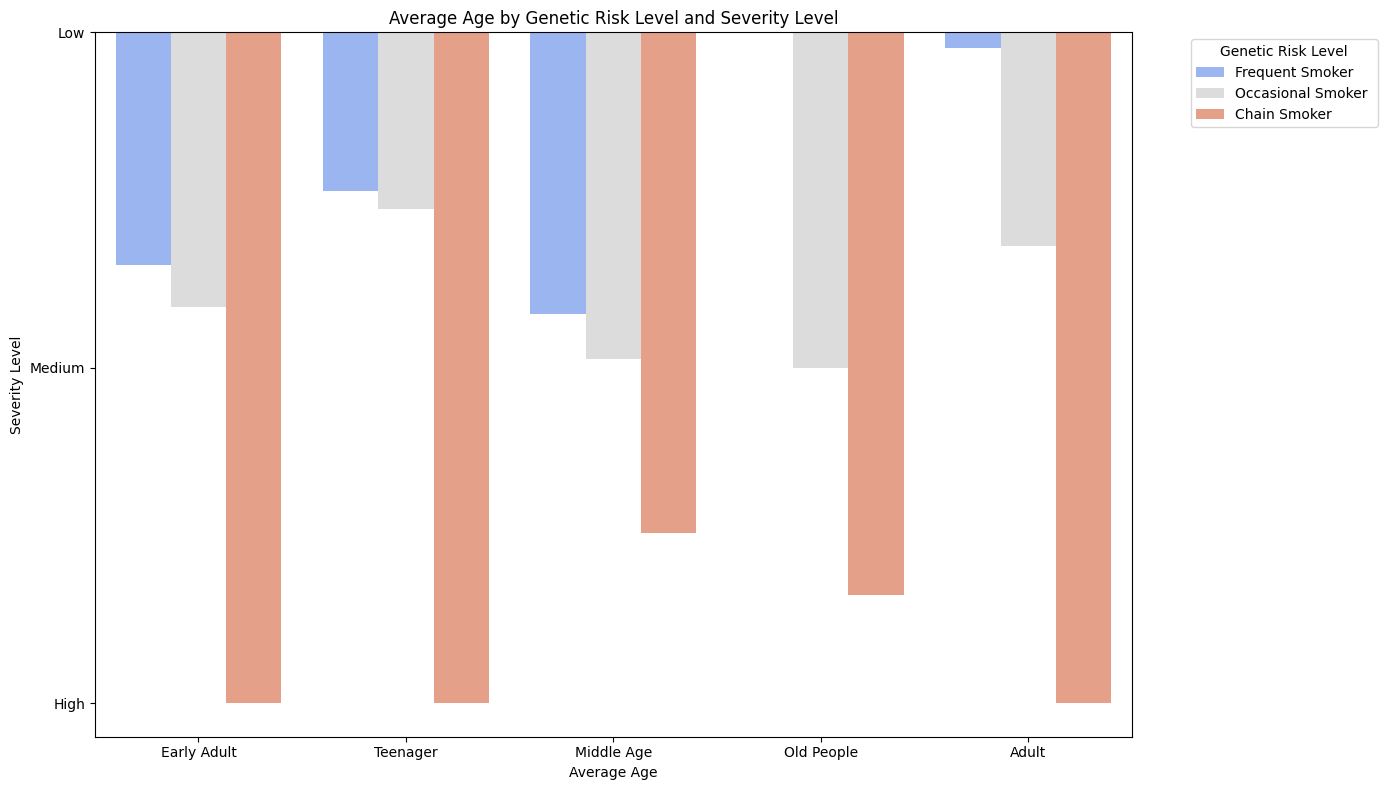

In [33]:
environmental_factors = ['Genetic Risk', 'Genetic Risk', 'OccuPational Hazards', 'Genetic Risk']

def categorize_smoking(Smoking):
    if 1 <= Smoking <= 2:
        return 'Occasional Smoker '
    elif 3 <= Smoking <= 6:
        return 'Frequent Smoker'
    elif 7 <= Smoking <= 8:
        return 'Chain Smoker'
    else:
        return 'Undefined'
df['Smoking Level'] = df['Smoking'].apply(categorize_smoking)

# Function to categorize factors into levels
def categorize_factor(value):
    if 1 <= value <= 2:
        return 'Low'
    elif 3 <= value <= 5:
        return 'Medium'
    elif 6 <= value <= 8:
        return 'High'
    else:
        return 'Undefined'

# Create new categorized columns for each environmental factor
for factor in environmental_factors:
    df[f'{factor} Level'] = df[factor].apply(categorize_factor)

# external_habit = ['Passive Smoker','Balanced Diet','Alcohol use']
# def external_habits(value):
#     if 1 <= value <= 2:
#         return 'Low'
#     elif 3 <= value <= 5:
#         return 'Medium'
#     elif 6 <= value <= 8:
#         return 'High'
#     else:
#         return 'Undefined'

# # Create new categorized columns for each environmental factor
# for habit in external_habit:
#     df[f'{habit} Level'] = df[habit].apply(external_habits)

plt.figure(figsize=(14, 8))

# Bar Plot: Average Age for each Hazard Level grouped by Severity Level
sns.barplot(
    x=df['Age Level'],
    y=df['Level'],
    hue=df['Smoking Level'],
    palette='coolwarm',

    ci=None
)
plt.title('Average Age by Genetic Risk Level and Severity Level')
plt.ylabel('Severity Level')
plt.xlabel('Average Age')
plt.legend(title='Genetic Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



C:\Users\OMEN\AppData\Local\Temp\ipykernel_6092\2731941159.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Level'], y=df['Age'], hue=df['Alcohol Level'], palette='managua', ci=None)


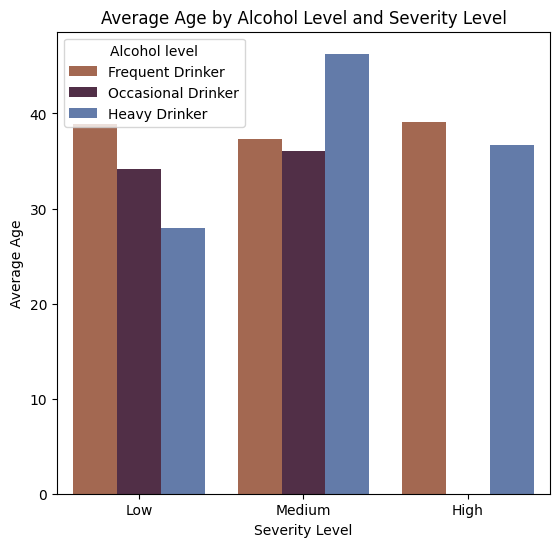

In [36]:
def categorize_alcohol(al):
    if 1 <= al <= 2:
        return 'Occasional Drinker'
    elif 3 <= al <= 6:
        return 'Frequent Drinker'
    elif 7 <= al <= 8:
        return 'Heavy Drinker'
    else:
        return 'Undefined'
df['Alcohol Level'] = df['Alcohol use'].apply(categorize_alcohol)


plt.figure(figsize=(14, 6))

# Bar Plot: Frequency of Occupational Passive Smokers by Severity Level
plt.subplot(1, 2, 1)
sns.barplot(x=df['Level'], y=df['Age'], hue=df['Alcohol Level'], palette='managua', ci=None)
plt.title('Average Age by Alcohol Level and Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Average Age')
plt.legend(title='Alcohol level')

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Replace 'Your spreadsheet name' with the actual name of your spreadsheet
# Replace 'Sheet1' with the name of the sheet you want to access
worksheet = gc.open('cancer patient data sets').worksheet('Sheet')

# Get all values from the worksheet
data = worksheet.get_all_values()